Importing the libraries

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [405]:
dataset = pd.read_csv('parkinsons.data').drop('name', axis = 1)
X = dataset.drop('status', axis = 1)
y = dataset['status']

Splitting the dataset into training and test set

In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Checking if the dataset has null values

In [407]:
dataset.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Checking if the dataset has duplicate values

In [408]:
dataset.duplicated().sum()

0

Feature selection

In [409]:
from sklearn.feature_selection import mutual_info_classif
fe = mutual_info_classif(X_train, y_train)
fe = pd.Series(fe)
fe.index = X_train.columns
fe.sort_values(ascending = False)

PPE                 0.276631
MDVP:Fo(Hz)         0.246126
spread1             0.220619
MDVP:Jitter(Abs)    0.198718
MDVP:Flo(Hz)        0.194151
MDVP:Fhi(Hz)        0.175632
spread2             0.155267
HNR                 0.144224
NHR                 0.138741
MDVP:APQ            0.129415
DFA                 0.129101
MDVP:Shimmer        0.128491
Shimmer:APQ5        0.127520
MDVP:Shimmer(dB)    0.123294
Shimmer:APQ3        0.112761
Shimmer:DDA         0.109068
MDVP:RAP            0.104816
MDVP:PPQ            0.102464
Jitter:DDP          0.100453
MDVP:Jitter(%)      0.099802
RPDE                0.049289
D2                  0.008691
dtype: float64

Plotting the graph for each feature

In [410]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        plot = sns.histplot(df[column_name], kde = True, color = 'green')
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()


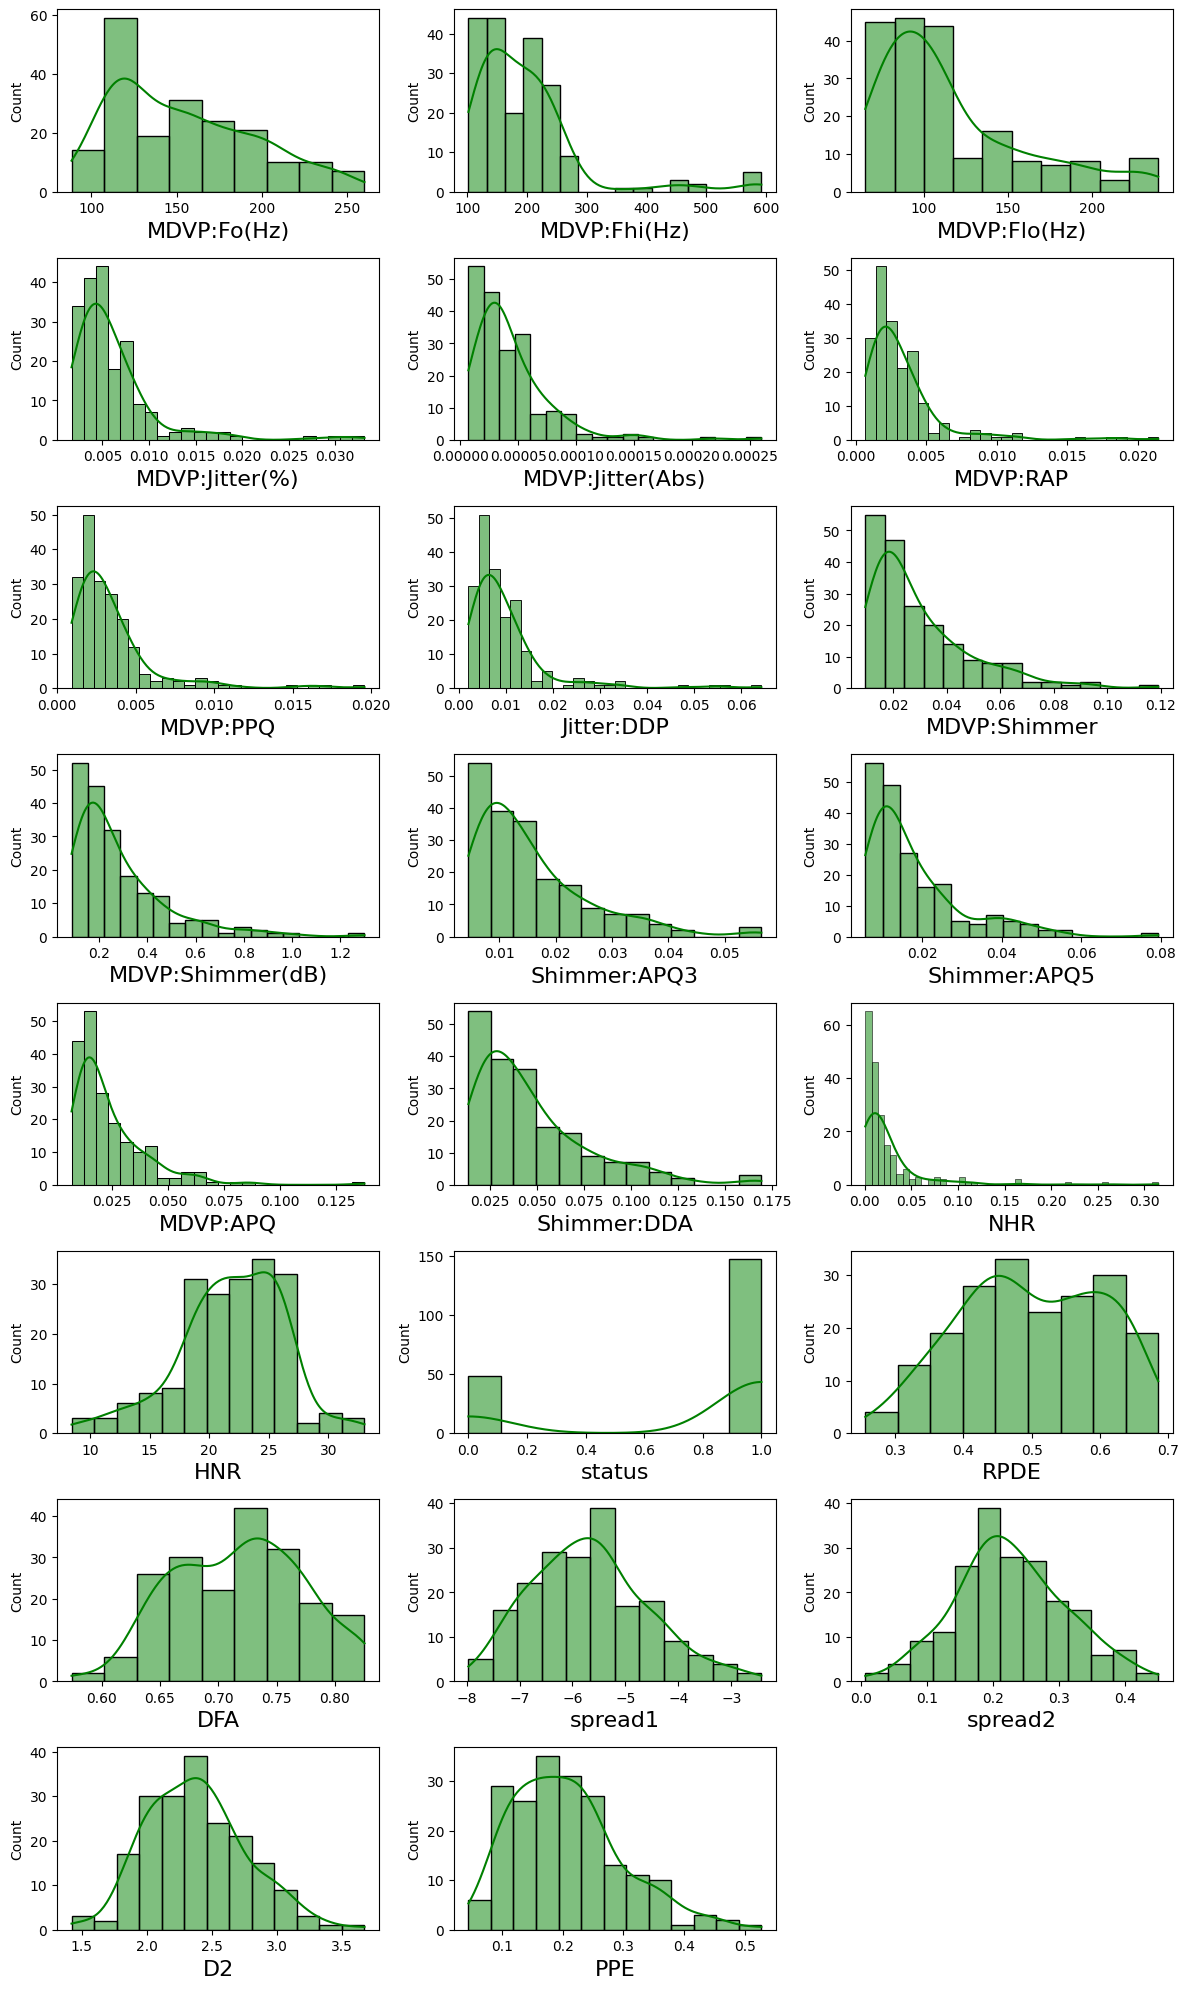

In [411]:
plot_data(dataset, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

Plotting the distribution of dataset

<ipython-input-412-ade1da66aff1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(dataset, x='status', palette=['red', 'yellow'], edgecolor='black', linewidth=3, alpha=0.9)


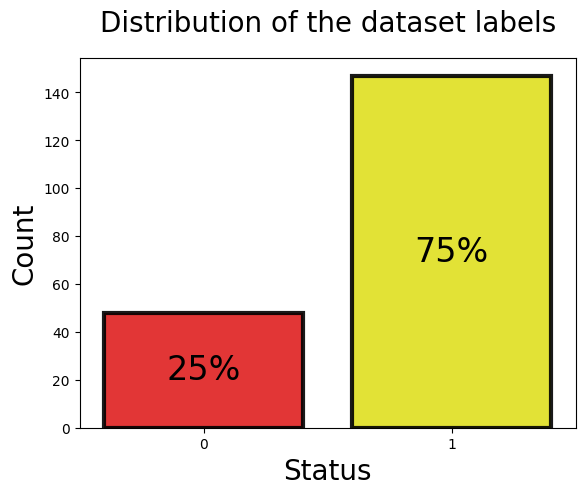

In [412]:
fig = sns.countplot(dataset, x='status', palette=['red', 'yellow'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(dataset['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20)
fig.set_ylabel('Count', fontsize=20)

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20)
plt.show()

Plotting the correlation graph

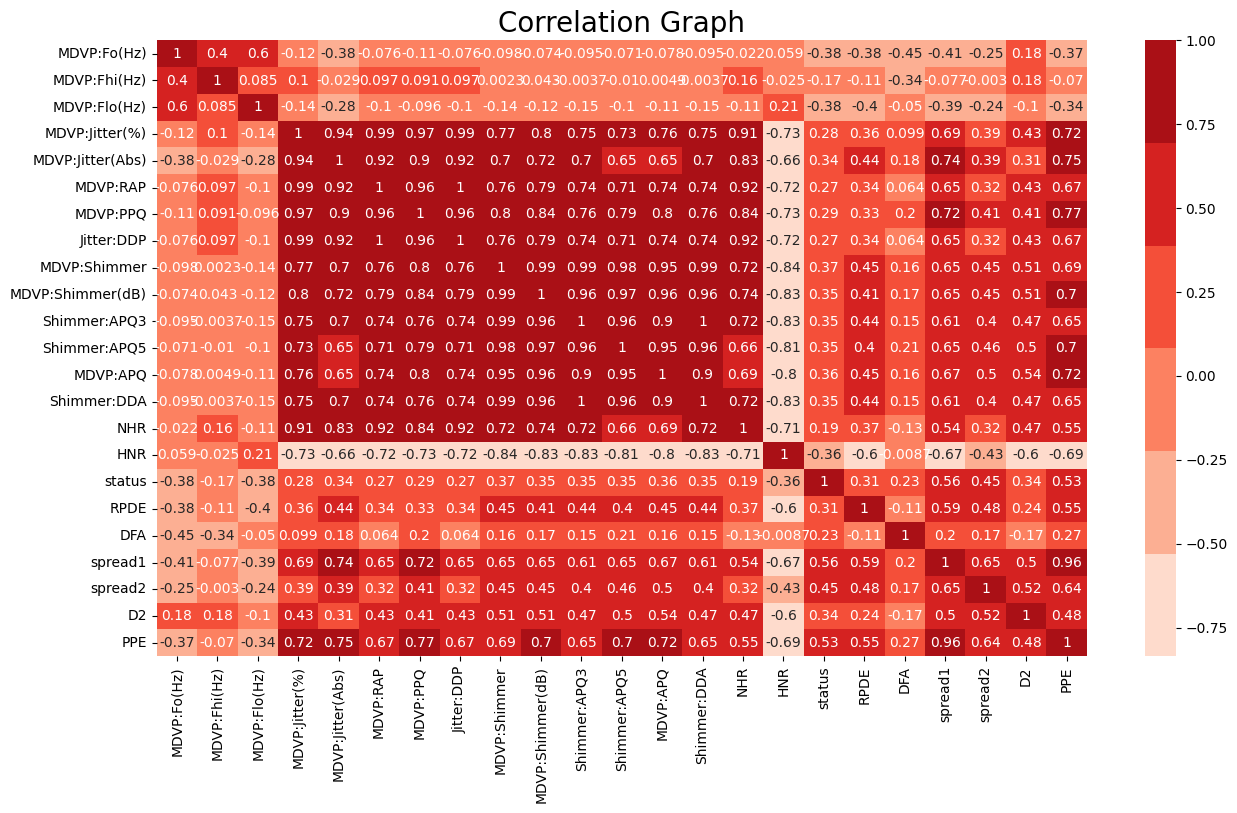

In [413]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)
cmap = sns.color_palette("Reds")
sns.heatmap(dataset.corr(), annot=True, cmap=cmap)
plt.show()

In [414]:
correlation = dataset.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]
status_corr.to_frame().style.background_gradient(cmap='Blues')

,status
status,1.000000
spread1,0.564838
PPE,0.531039
spread2,0.454842
MDVP:Shimmer,0.367430
MDVP:APQ,0.364316
Shimmer:APQ5,0.351148
MDVP:Shimmer(dB),0.350697
Shimmer:APQ3,0.347617
Shimmer:DDA,0.347608


<Axes: >

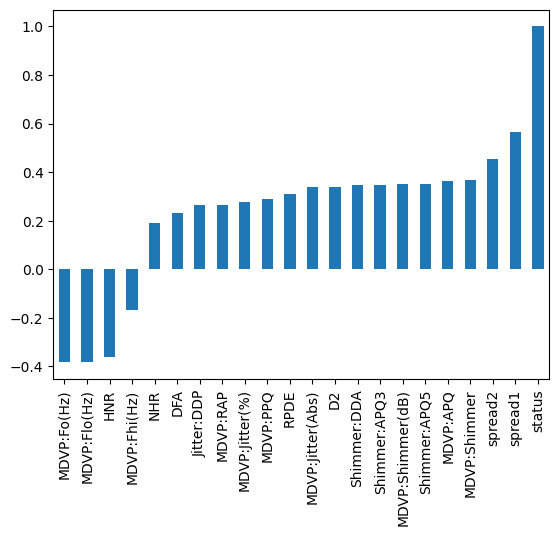

In [415]:
dataset.corr()['status'][:-1].sort_values().plot(kind='bar')

Feature Scaling

In [416]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

Importing libraries for neural networks

In [417]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Convolution1D, MaxPooling1D, ZeroPadding1D
from tensorflow.keras.optimizers import Adam

Reshaping the data

In [418]:
X_train_scale = X_train_scale.reshape(X_train_scale.shape[0], X_train_scale.shape[1], 1)
X_test_scale = X_test_scale.reshape(X_test_scale.shape[0], X_test_scale.shape[1], 1)

Convolutional Neural Network

In [490]:
cnn = Sequential()
cnn.add(Convolution1D(filters = 32, kernel_size = 2, activation = 'relu'))
cnn.add(MaxPooling1D(pool_size = 2, strides = 2))
cnn.add(Flatten())
cnn.add(Dense(units = 220, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 360, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 1, activation = 'sigmoid'))
cnn.add(Dropout(0.2))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model = cnn.fit(x = X_train_scale, y = y_train, validation_data = (X_test_scale, y_test), batch_size = 100, epochs = 1200)

Epoch 1/1200
2/2 [==============================] - 2s 474ms/step - loss: 2.4511 - accuracy: 0.6538 - val_loss: 0.5493 - val_accuracy: 0.7949
Epoch 2/1200
2/2 [==============================] - 0s 59ms/step - loss: 3.2166 - accuracy: 0.6410 - val_loss: 0.4972 - val_accuracy: 0.7436
Epoch 3/1200
2/2 [==============================] - 0s 78ms/step - loss: 3.7632 - accuracy: 0.6474 - val_loss: 0.4924 - val_accuracy: 0.7436
Epoch 4/1200
2/2 [==============================] - 0s 133ms/step - loss: 2.4642 - accuracy: 0.6923 - val_loss: 0.4632 - val_accuracy: 0.7692
Epoch 5/1200
2/2 [==============================] - 0s 82ms/step - loss: 2.9074 - accuracy: 0.7115 - val_loss: 0.4204 - val_accuracy: 0.7949
Epoch 6/1200
2/2 [==============================] - 0s 75ms/step - loss: 2.1430 - accuracy: 0.7756 - val_loss: 0.4074 - val_accuracy: 0.7949
Epoch 7/1200
2/2 [==============================] - 0s 75ms/step - loss: 3.1699 - accuracy: 0.7308 - val_loss: 0.4111 - val_accuracy: 0.7949
Epoch 8/120

Prediction

In [491]:
predictions = (cnn.predict(X_test_scale) > 0.5).astype("int32")

2/2 [==============================] - 0s 5ms/step


Confusion matrix

In [492]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))

[[ 4  3]
 [ 0 32]]


Classification report

In [493]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



Accuracy

In [494]:
print(accuracy_score(y_test,predictions))

0.9230769230769231


In [495]:
print(model.history)

{'loss': [2.45113468170166, 3.216607093811035, 3.763235330581665, 2.4641687870025635, 2.907433032989502, 2.1429603099823, 3.169874429702759, 3.057101011276245, 1.7822093963623047, 2.04376482963562, 3.126796245574951, 2.439793109893799, 1.9466302394866943, 2.9103615283966064, 2.685386896133423, 2.2092137336730957, 2.697279214859009, 3.1804237365722656, 1.9857473373413086, 2.8551583290100098, 2.7565581798553467, 1.7601711750030518, 2.2578182220458984, 2.6633787155151367, 2.144605875015259, 2.3387515544891357, 1.9369522333145142, 2.424588441848755, 2.716871500015259, 2.513272285461426, 2.50439190864563, 2.515221118927002, 1.6125253438949585, 2.009920835494995, 2.003849506378174, 1.7095340490341187, 2.794893980026245, 2.583871841430664, 2.388563871383667, 3.0802135467529297, 3.2796192169189453, 1.4049099683761597, 1.5000231266021729, 2.781646251678467, 2.291207790374756, 2.8815858364105225, 2.7821555137634277, 2.485544443130493, 2.97209095954895, 2.979431629180908, 1.8847097158432007, 1.58

In [496]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plotting the model's accuracy

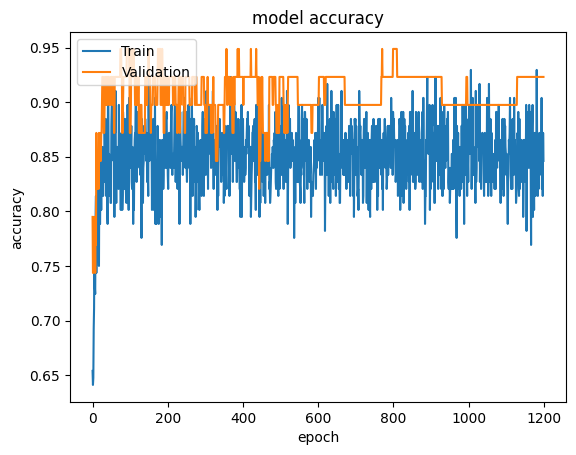

In [497]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Plotting the model's loss

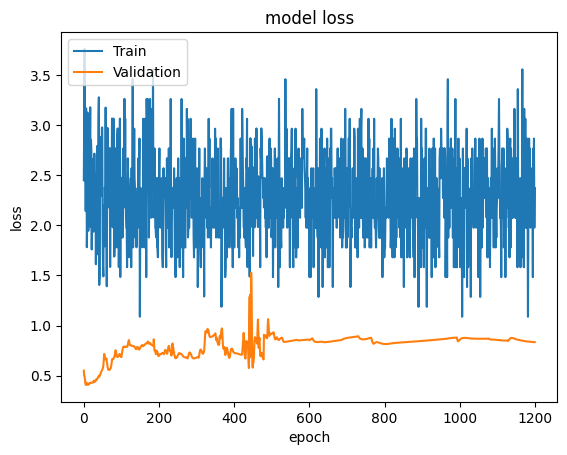

In [498]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()